# Lending Club Case Study

## Problem Statement

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
* **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
* **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
* **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

In other words, **borrowers** who **default** cause the largest amount of **loss to the lenders**. In this case, the customers labelled as *'charged-off' are the 'defaulters'*.

The core objective of the excercise is to **help the company minimise the credit loss**. There are two potential sources of **credit loss** are:
* Applicant **likely to repay the loan**, such an applicant will bring in profit to the company with interest rates.** Rejecting such applicants will result in loss of business**.
* Applicant **not likely to repay** the loan, i.e. and will potentially default, then approving the loan may lead to a financial loss* for the company




## Importing libraries
In this case study we'll import python libraries:-
* Numpy
* Pandas
* Matplotlib
* Seaborn

In [11]:
# Importing all libraries required.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly.express as px

#Regular expression library

import re

# Ignore warnings due to version problems

import warnings
warnings.filterwarnings('ignore')

## Load loan data
Loading loan.csv data file into the jupyter notebook.

In [12]:
#read the dataset and check the first five rows

loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
#Check the shape and datatype info of the dataframe
print(loan.shape)
print(loan.info(1))

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17

## Data Cleaning and Manipulation
Data Quality Issues can be treated by
- For Missing Values in the Columns:
    - Dropping the columns containing maximum null values
    - Dropping the coumns which are not required for the analysis
    - Drop columns with just a single value
    - Drop columns which does not add any value to analysis.
- For Missing Values in the Rows 
    - Filter rows to perform targeted analysis 
    - Dropping the rows containing the missing values
    - Check for data inconsistencies
- Missing Value Imputation
- Removing Duplicate Entries
- Incorrect Data Types:
    - Clean certain values/Manipulation of strings 
    - Clean and convert an entire column to correct data type e.g date, int64 etc.
    - Converting the columns to numeric variables in order to perform more analysis.
- Treating outliers

#### Checking All Null value columns
Check the Null values in the columns and drop those columns

In [15]:
loan = loan.loc[:,(loan.isnull().sum()/loan.shape[0]*100)<50]
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#### Drop columns with single value as these will not be helpful in the analysis
Removing columns that have single values in all rows.

These values won't contribute in analysis.

In [16]:
unique = loan.nunique()
unique_col_list = unique[unique.values==1]
unique_col_list

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [17]:
loan.drop(unique_col_list.index,axis=1,inplace = True)
loan.shape

(39717, 45)

#### Removing unwanted columns
Removing other unwanted columns from data which won't be needed for analysis:-
- "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"

In [18]:
loan.drop(["url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)

In [20]:
print(loan.dtypes)
print(loan.isnull().sum())

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term     

#### Null Values Imputation

In [23]:
loan.emp_length.fillna(value="0",inplace=True)
loan.revol_util.fillna(value="0",inplace=True)
loan.pub_rec_bankruptcies.fillna(value=0.0,inplace=True)

### Datatype Conversions
Converting parameters to int64 & datetime. Parameters changed are:-
* funded_amnt_inv
* annual_inc
* pub_rec_bankruptcies
* term
* int_rate
* New Derived Fields from **issue_d** datetime:
    - year
    - month

In [24]:
loan.funded_amnt_inv = loan.funded_amnt_inv.astype("int64")
loan.annual_inc = loan.annual_inc.astype("int64")
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype("int64")
loan.term = loan.term.str.replace(" months",'').astype('int64')
loan.int_rate = loan.int_rate.str.replace("%",'').astype('float64')

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year.astype('int64')
loan['month']=loan['issue_d'].dt.month.astype('int64')

loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [25]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                       int64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                      object
total_acc                        int64
total_pymnt_inv                float64
pub_rec_bankruptcies     

#### Removing Current Applicatants
The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
We cannot make anything up for the current loans as investors have invested in them and they are still in process.

In [26]:
loan = loan[loan.loan_status != "Current"]
loan.shape

(38577, 28)

In [27]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt_inv,pub_rec_bankruptcies,year,month
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.392332,41.898437,11.932219,322.466318,4.808668,6.877797e+04,13.272727,0.871737,9.275423,0.055422,22.052648,11271.196153,0.042694,2010.309070,7.114757
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.699340,10.333136,3.691327,208.639215,3.598645,6.421868e+04,6.673044,1.071546,4.401588,0.237804,11.425861,8700.845592,0.202809,0.882658,3.408523
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2007.000000,1.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,13.000000,5019.590000,0.000000,2010.000000,4.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.000000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,20.000000,9066.660000,0.000000,2011.000000,7.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000,15329.780000,0.000000,2011.000000,10.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,58563.680000,2.000000,2011.000000,12.000000


## Univariate Analysis

### Loan Amount

Loan Amount is the Amount requested by the Borrower.

In [47]:
loan['loan_amnt'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

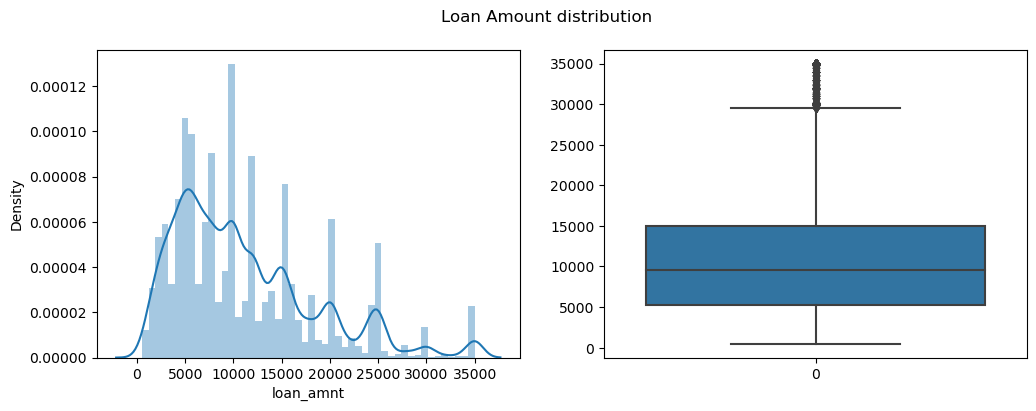

In [49]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sb.distplot(a=loan.loan_amnt)

plt.subplot(1,2,2)
sb.boxplot(data=loan.loan_amnt)

plt.suptitle('Loan Amount distribution')
plt.show()

#### Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

### Funded Amount

Funded Amount is the amount LendingClub can provide to the Borrower.

In [52]:
loan['funded_amnt'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
5%        2400.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

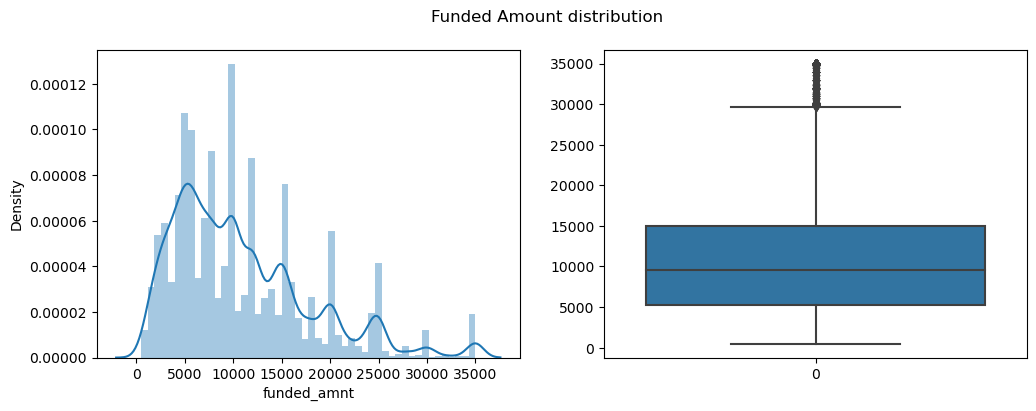

In [51]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sb.distplot(a=loan.funded_amnt)

plt.subplot(1,2,2)
sb.boxplot(data=loan.funded_amnt)

plt.suptitle('Funded Amount distribution')
plt.show()

#### Observations:
Funded amount data behaves similar to loan Amount. It tells us that Lending club approved most of Applied loan amount.

### Funded Amount Invested

This is the amount an invester invests for a brrower applcation in LendinClub.

In [53]:
loan.funded_amnt_inv.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    38577.000000
mean     10222.392332
std       7022.699340
min          0.000000
5%        1800.000000
25%       5000.000000
50%       8733.000000
75%      14000.000000
95%      24500.000000
99%      34714.360000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

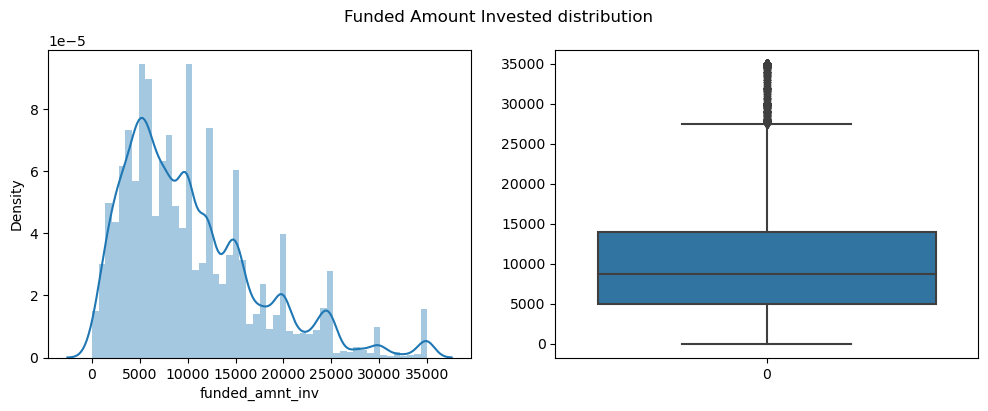

In [55]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sb.distplot(a=loan.funded_amnt_inv)

plt.subplot(1,2,2)
sb.boxplot(data=loan.funded_amnt_inv)

plt.suptitle('Funded Amount Invested distribution')
plt.show()

#### Observations:
Funded amount investment data behaves similar to loan Amount, which tells us that Lending club approved atmost of Applied loan amount

### Interest rate

In [96]:
loan.int_rate.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
5%           6.170000
25%          8.940000
50%         11.710000
75%         14.270000
95%         18.250000
99%         20.890000
max         24.400000
Name: int_rate, dtype: float64

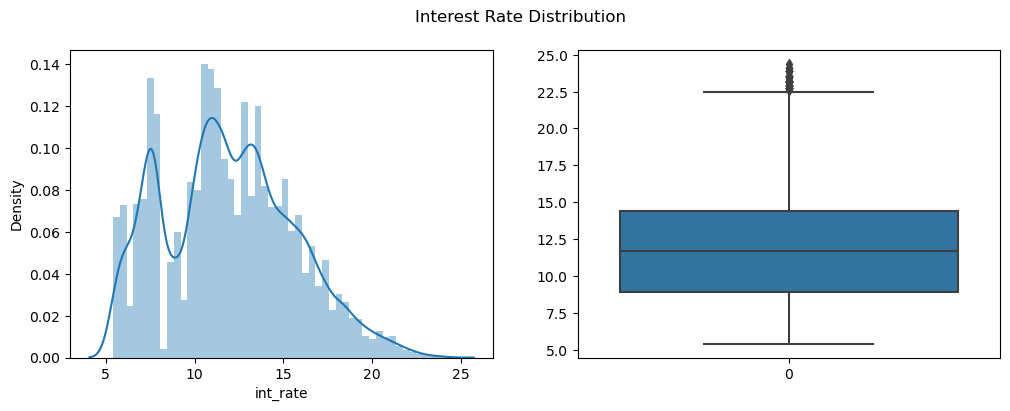

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan.int_rate)
plt.subplot(1,2,2)
sb.boxplot(data=loan.int_rate)
plt.suptitle('Interest Rate Distribution')
plt.show()

#### Observations:
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

### Installment
The monthly payment owed by the borrower

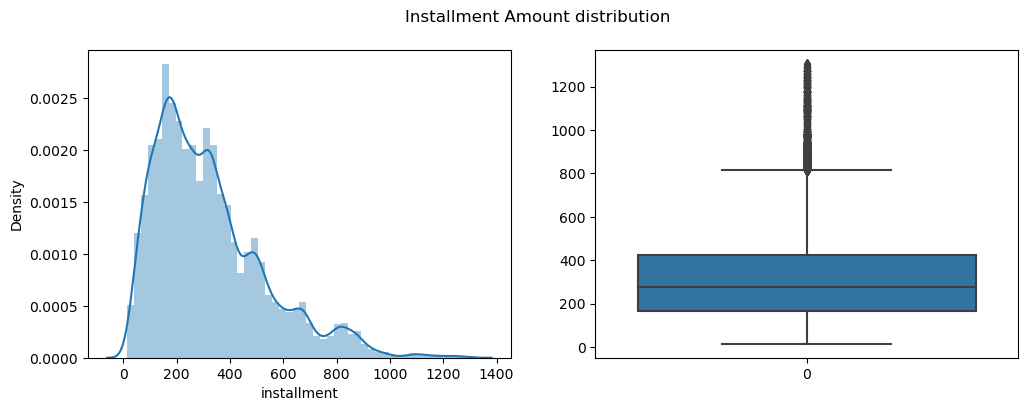

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan.installment)
plt.subplot(1,2,2)
sb.boxplot(data=loan.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

#### Observations:
The Most representative value of Installment amount is around 300.

### Annual Income
The annual income provided by the borrower during registration.

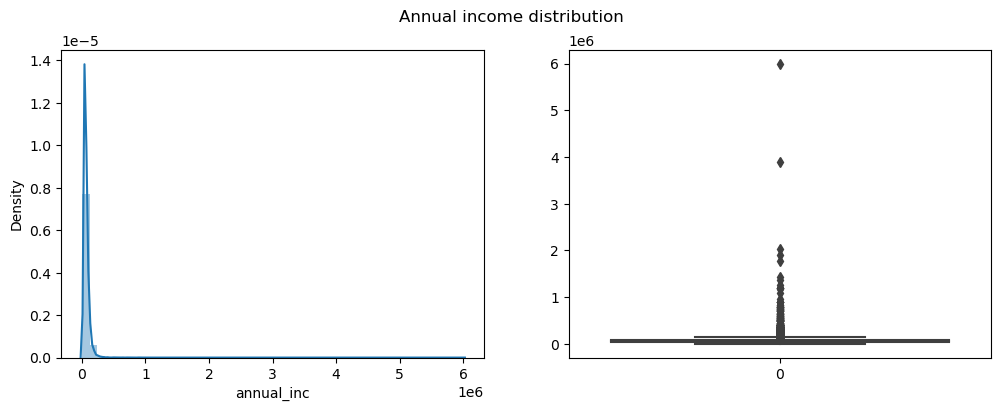

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan.annual_inc)
plt.subplot(1,2,2)
sb.boxplot(data=loan.annual_inc)
plt.suptitle('Annual income distribution')
plt.show()

##### Handling Outliers

In [62]:
loan = loan[loan.annual_inc <= loan.annual_inc.quantile(0.95)]

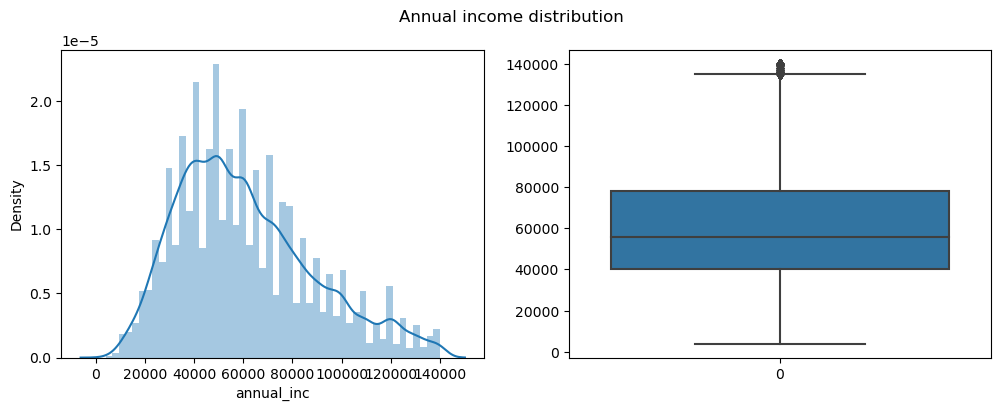

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan.annual_inc)
plt.subplot(1,2,2)
sb.boxplot(data=loan.annual_inc)
plt.suptitle('Annual income distribution')
plt.show()

### DTI
Ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

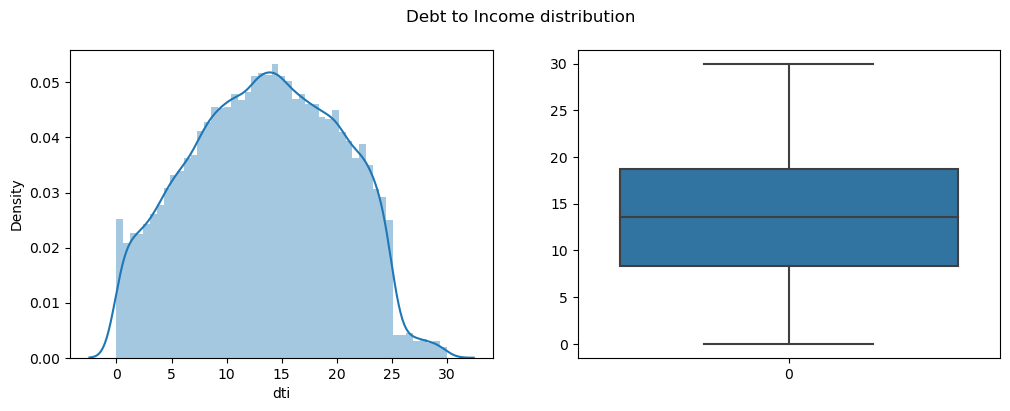

In [65]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan.dti)
plt.subplot(1,2,2)
sb.boxplot(data=loan.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

#### Observations:
There are no outliers, which means that all the loans are given to borrowers who have Debt to Income ration less than 30.

### Loan Status
Status of Loan i.e "Fully Paid" and "Charged Off". We have already excluded "Current" ones above in data cleaning.

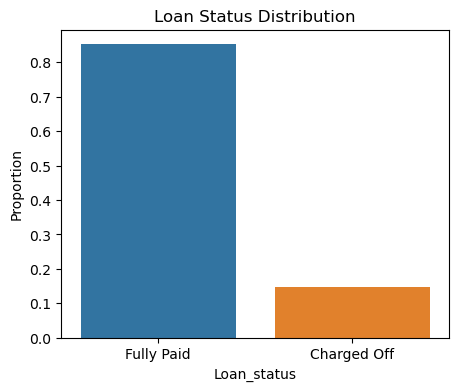

In [80]:
plt.figure(figsize=(5,4))

prob_df = loan['loan_status'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('Loan_status')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution')
plt.show()

#### Observations:
85% of borrowers has paid the loan fully. whereas 15% are defaulted the loan.

### Verification Status

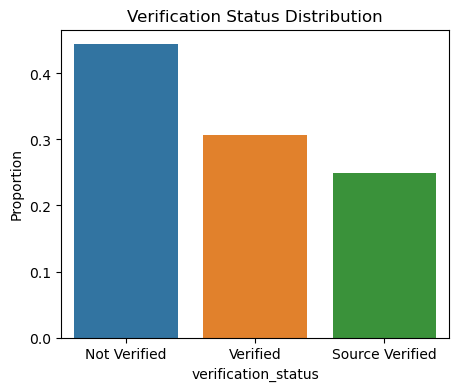

In [89]:
plt.figure(figsize=(5,4))
prob_df = loan['verification_status'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='verification_status', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('Verification Status Distribution')
plt.show()

#### Observations:
Most of the loans were given without verification of applicants income.

In [86]:
loan.verification_status.describe()

count            36654
unique               3
top       Not Verified
freq             16280
Name: verification_status, dtype: object

### Home Ownership

This is the borower's home ownership status:-
* Own House
* Rent
* Mortgage
* Other

Mostly people with their own home likely to pay fully.

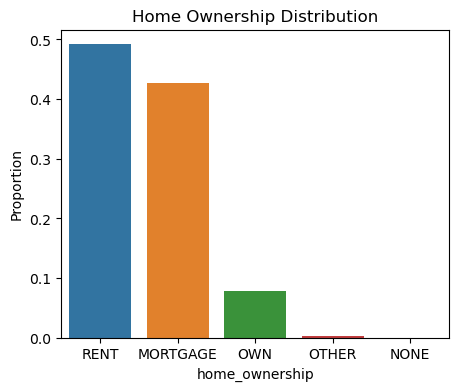

In [90]:
plt.figure(figsize=(5,4))
prob_df = loan['home_ownership'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

#### Observations:
The loan borrowers are more having rented and mortgage houses than owning their own house.

### Employment Length

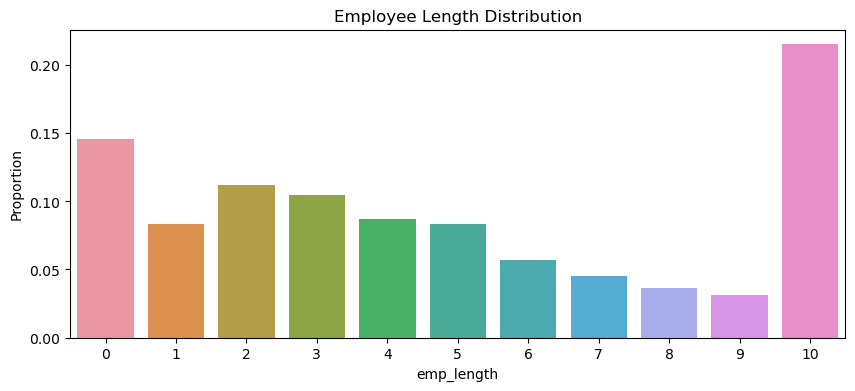

In [93]:
plt.figure(figsize=(10,4))
prob_df = loan['emp_length'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('Employee Length Distribution')
plt.show()

#### Observations:
Borrowers are mostly 10+ years emploment length.

### Grade

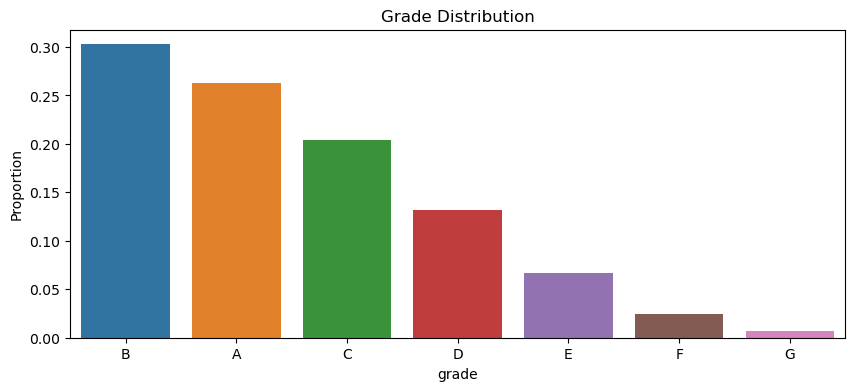

In [94]:
plt.figure(figsize=(10,4))
prob_df = loan['grade'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='grade', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('Grade Distribution')
plt.show()

#### Observations:
Most of the Borrowers lie in A & B grades

### Term

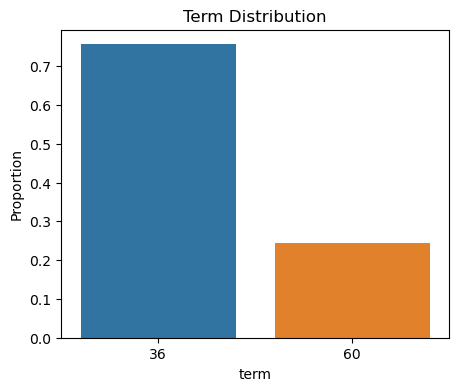

In [99]:
plt.figure(figsize=(5,4))
prob_df = loan['term'].value_counts(normalize=True).reset_index()

sb.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

### Loan Issue Date

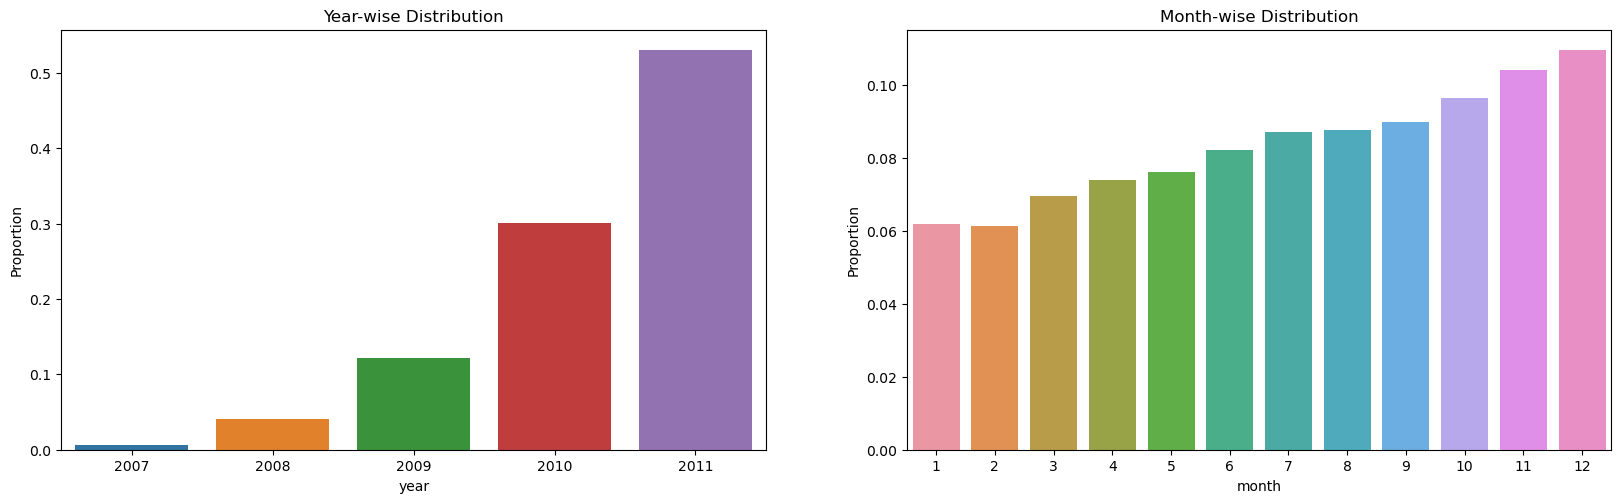

In [102]:
prob_df = loan['year'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sb.barplot(x='index', y='year', data=prob_df)
plt.xlabel('year')
plt.ylabel('Proportion')
plt.title('Year-wise Distribution')

prob_df = loan['month'].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sb.barplot(x='index', y='month', data=prob_df)
plt.xlabel('month')
plt.ylabel('Proportion')
plt.title('Month-wise Distribution')

plt.show()

#### Observations:
The LendingClub has doubling up loan issue every year.

Loan issue gradually increases month-wise. There are more issues of loan in last 3 months every end of the year.

### Public Record Bankruptcies
Number of public record bankruptcies

In [132]:
loan.groupby(by='loan_status').pub_rec_bankruptcies.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
loan_status,,,,,,,,,,,
Charged Off,5418.0,0.067368,0.252150,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
Fully Paid,31236.0,0.039826,0.196044,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


Text(0.5, 1.0, 'Public record Bankruptcies Distribution')

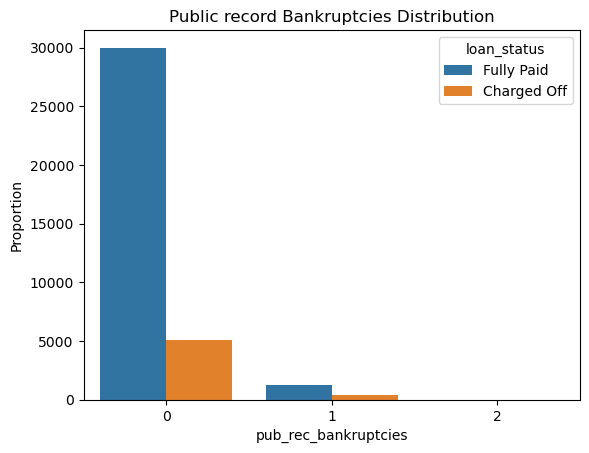

In [125]:
sb.countplot(x='pub_rec_bankruptcies', data=loan, hue='loan_status')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Proportion')
plt.title('Public record Bankruptcies Distribution')

#### Observations:
* Around 99% Fully Paid doesn't have Public Record Bankruptcies.
* Around 95% Charged Off Public Record Bankruptcies.

### Public derogatory records

In [108]:
loan.pub_rec.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    36654.000000
mean         0.056829
std          0.240307
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          1.000000
99%          1.000000
max          4.000000
Name: pub_rec, dtype: float64

Text(0.5, 1.0, 'Public derogatory records Distribution')

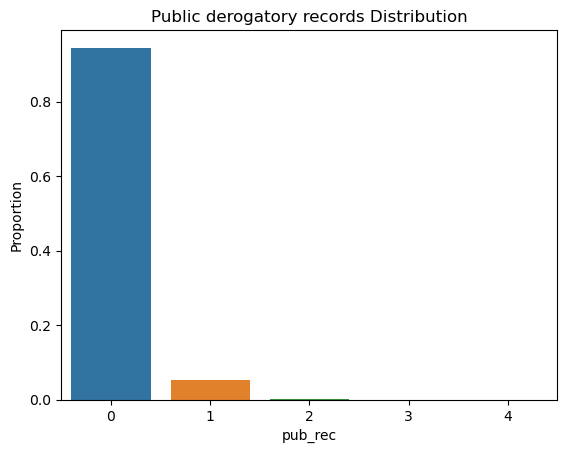

In [123]:
prob_df = loan['pub_rec'].value_counts(normalize=True).reset_index()
sb.barplot(x='index', y='pub_rec', data=prob_df)
plt.xlabel('pub_rec')
plt.ylabel('Proportion')
plt.title('Public derogatory records Distribution')

#### Observations
Around 95% borrower's are having no public derogatory records.

In [111]:
loan.purpose.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count                  36654
unique                    14
top       debt_consolidation
freq                   17305
Name: purpose, dtype: object

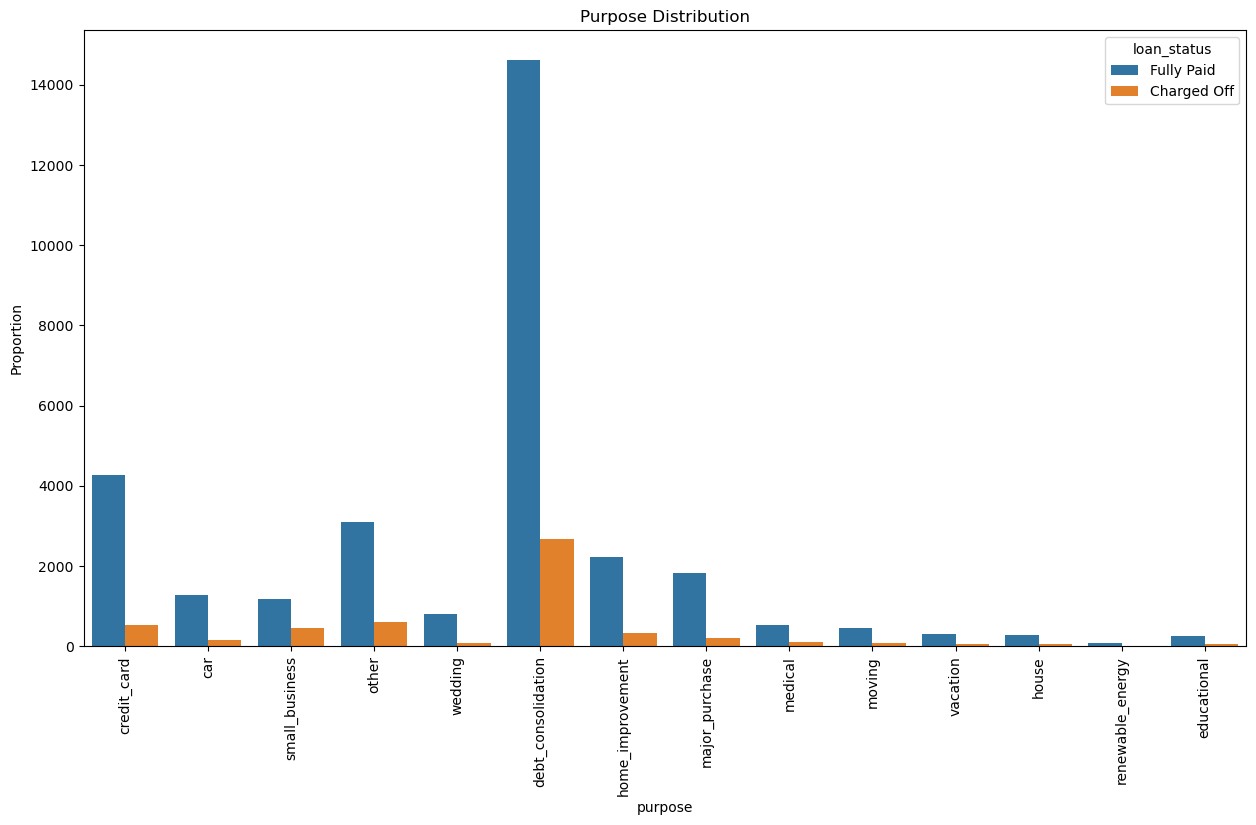

In [119]:
plt.figure(figsize=(15,8))

sb.countplot(x='purpose', data=loan, hue='loan_status')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

#### Observations:
* More number of people took loan for debt consolidation and a very few people took for renewable energy for Fully Paid.
* More number of people took loan for debt consolidation and a very few people took for renewable energy for Charged Off.
* For all the Puposes Fully Paid are more than defaulters.